In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns

In [18]:
data = pd.read_csv("1,2,3월_2.csv")

In [19]:
data

,Unnamed: 0,년월,업종명,연령대,성별,생애주기,고객수,금액,건수
0,598167,201901,카페,20s,2,1,3,24890,3
1,598168,201901,카페,20s,2,1,3,17800,3
2,598169,201901,카페,30s,2,2,3,28500,4
3,598170,201901,카페,20s,1,1,3,27900,4
4,598171,201901,카페,40s,1,3,3,20600,3
...,...,...,...,...,...,...,...,...,...
224535,23899428,202003,일반 음식점업,20s,1,1,8,904800,16
224536,23899429,202003,일반 음식점업,30s,1,1,3,331800,4
224537,23899430,202003,일반 음식점업,30s,1,2,7,1153000,28
224538,23899431,202003,일반 음식점업,40s,1,3,3,73000,3


In [20]:
data = data.drop(['Unnamed: 0'], axis = 1, inplace = False)

In [21]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# windows 인 경우
    font_name = font_manager.FontProperties(fname="c:\Windows\Fonts\malgun.ttf").get_name()
    rc('font', family=font_name)
else: 
# mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

# 정규성 검정

In [22]:
data["log금액"] = np.log10(data["금액"])

C:\Users\LG\anaconda3\envs\tens_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


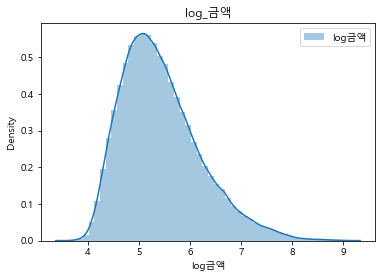

In [23]:
sns.distplot(data["log금액"], label="log금액")
plt.title("log_금액")

plt.legend()
plt.show()

# 다중 공선성 확인

In [24]:
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [25]:
data["연령대"] = data["연령대"].str.rstrip("s").astype("int")

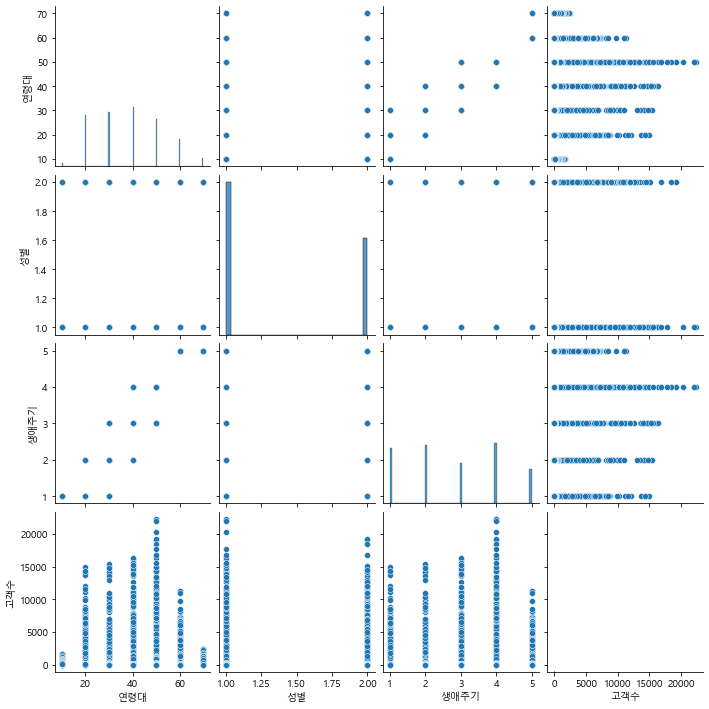

In [26]:
sns.pairplot(data[["연령대","성별","생애주기","고객수"]])

# 연령대와 생애주기 간의 선형성이 보임